In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
imdb = pd.read_csv("meta/imdb.csv")
wiki = pd.read_csv("meta/wiki.csv")
df = pd.concat([imdb, wiki])

In [5]:
print(imdb.shape)
print(wiki.shape)
print(df.shape)

(171852, 3)
(38138, 3)
(209990, 3)


In [13]:
df.head()

,genders,ages,img_paths,age_15_25
0,1,69,01/nm0000001_rm946909184_1899-5-10_1968.jpg,False
1,1,69,01/nm0000001_rm980463616_1899-5-10_1968.jpg,False
2,0,79,02/nm0000002_rm1346607872_1924-9-16_2004.jpg,False
3,0,79,02/nm0000002_rm1363385088_1924-9-16_2004.jpg,False
4,0,49,02/nm0000002_rm221957120_1924-9-16_1974.jpg,False


### Distribution of age and size of the 15-25 (inclusive) bucket

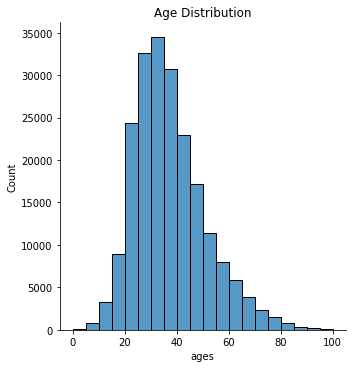

In [54]:
age_distro = sns.displot(df, x="ages", binwidth=5)
plt.title("Age Distribution")
plt.savefig("age_distro.png", bbox_inches="tight")

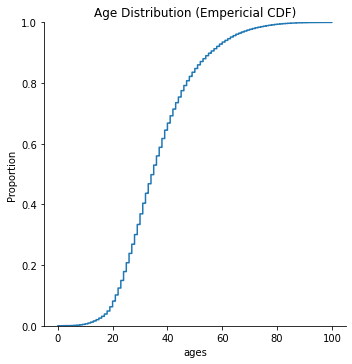

In [53]:
sns.displot(df, x="ages", kind="ecdf")
plt.title("Age Distribution (Empericial CDF)")
plt.savefig("age_distro_ecdf.png", bbox_inches="tight")

In [8]:
df['age_15_25'] = df['ages'].apply(lambda x: 15<=x<=25)

In [16]:
df['age_15_25'].value_counts()

False    170591
True      39399
Name: age_15_25, dtype: int64

In [17]:
df['age_15_25'].value_counts(normalize = True)

False    0.812377
True     0.187623
Name: age_15_25, dtype: float64

### What percentage of the this population is 30 year old males?

In [55]:
df['age_30_male'] = df.apply(lambda x: (x['ages'] == 30) & (x['genders'] == 1), axis=1)

In [57]:
df['age_30_male'].value_counts(normalize = True)

False    0.981266
True     0.018734
Name: age_30_male, dtype: float64

In [58]:
df.shape

(209990, 5)

## 